# **Geospatial Data Handling and Visualization**

## **1. Geospatial Data Handling**
Geospatial data refers to information about geographic locations and features. It can come in various formats such as shapefiles, GeoJSON, or OSM (OpenStreetMap) data. Handling geospatial data effectively is crucial for mapping, spatial analysis, and decision-making.

#### Libraries Used:-

*   GeoPandas: An open-source Python library that provides easy-to-use data structures and data analysis tools for working with geospatial data. It extends the capabilities of pandas to include support for spatial operations.
*   OSMnx: A Python library for downloading, modeling, and analyzing street networks from OpenStreetMap data.






In [10]:
!pip install osmnx geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.7 MB/s eta 0:00:00


In [27]:
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as ctx

In [16]:
osm_pbf = '/content/israel-and-palestine-latest.osm.pbf'

In [19]:
place_name = "Tel Aviv, Israel"

In [20]:
graph = ox.graph_from_place(place_name, network_type='all')

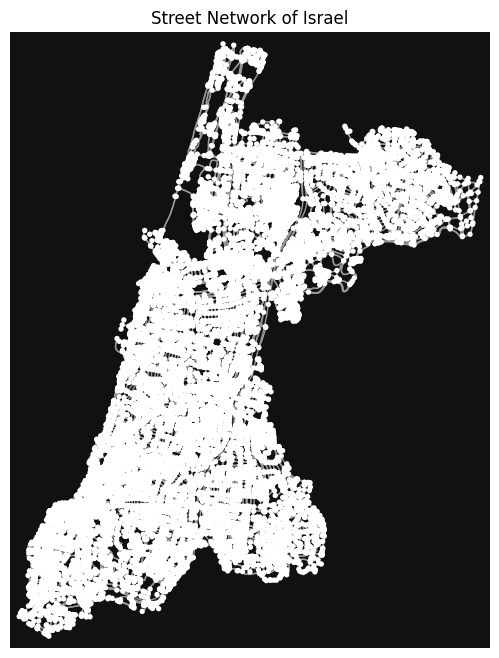

In [21]:
fig, ax = ox.plot_graph(ox.project_graph(graph), show=False, close=False)
plt.title('Street Network of Israel')
plt.show()

In [22]:
graph = ox.graph_from_place(place_name, network_type='all')

In [23]:
projected_graph = ox.project_graph(graph)

In [29]:
crs = ox.settings.default_crs

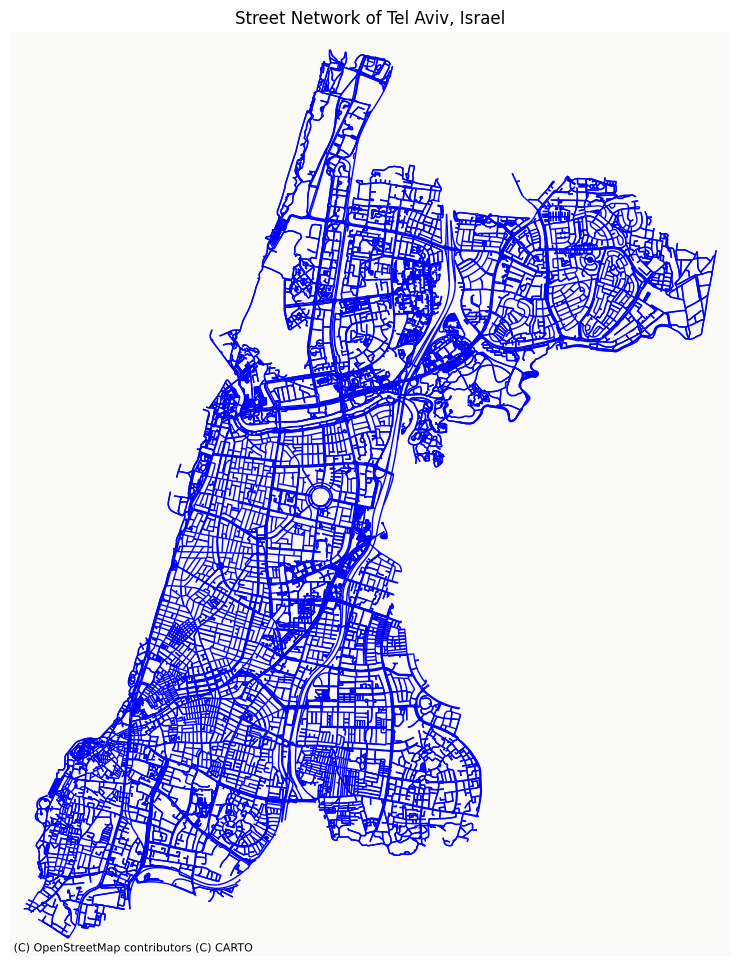

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
ox.plot_graph(projected_graph, ax=ax, node_size=0, edge_color='blue', edge_linewidth=1, show=False, close=False)
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.CartoDB.Positron)
plt.title(f'Street Network of {place_name}')
plt.show()

---

## **2. Ontology Development**
Ontology in the context of geospatial data refers to defining and structuring the concepts, relationships, and attributes related to geographic entities. It helps in representing knowledge in a structured way that can be used for data integration, semantic search, and more.

###Libraries Used:-



*   RDFlib: A library for working with RDF (Resource Description Framework) data in Python. It allows for the creation, manipulation, and querying of RDF graphs.
*   OWLReady2: A library for ontology-oriented programming in Python. It provides tools to create and manage OWL ontologies and RDF data.




Ontology development involves creating a structured representation of knowledge that defines concepts, relationships, and attributes relevant to a specific domain. For geospatial data, this might include concepts like "City," "Country," "Landmark," and relationships like "located_in" or "contains."

Yes, RDF graphs are often used to represent data within the framework of an ontology. Here's a refined explanation tailored to your context:

---

### **Theory: Ontology and RDF Graphs**

#### **1. Ontology in Context:**
- **Ontology:** In the realm of semantic web technologies and data science, an ontology defines a structured framework for representing knowledge about a domain. It includes concepts (classes), properties (relationships), and individuals (instances) within that domain.

#### **2. RDF (Resource Description Framework):**
- **RDF:** RDF is a framework used to describe resources and their relationships in the form of triples. Each triple consists of a subject, predicate (property), and object. This structure is foundational for representing data in ontologies.

#### **3. Components of an RDF Graph:**
- **Nodes (Entities):** These represent the resources or concepts. In your case, entities might include cities like `Tel_Aviv` and `Jerusalem`.
- **Edges (Properties/Relationships):** These represent the relationships between nodes or attributes of nodes. For example, the properties `has_latitude` and `has_longitude` describe the geographic coordinates of cities.

#### **4. Creating an RDF Graph with Ontology:**
- **Defining Ontology Concepts:**
  - **URIs for Entities:** Unique identifiers for resources, e.g., `http://dbpedia.org/resource/Tel_Aviv`.
  - **URIs for Properties:** Attributes or relationships, e.g., `http://dbpedia.org/ontology/latitude`.
- **Populating the Graph:**
  - **Add Triples:** Describe relationships and properties of entities using triples.
  ```python
  for city, (lat, lon) in city_coordinates.items():
      g.add((URIRef(city), has_latitude, Literal(lat)))
      g.add((URIRef(city), has_longitude, Literal(lon)))
  ```

#### **5. Visualizing the RDF Graph:**
- **Purpose:** Visualization helps in understanding the structure and relationships within the ontology. It provides a visual representation of how entities are interconnected and what attributes they possess.
- **Interpreting the Graph:**
  - **Entities (Nodes):** Represent concepts or instances within your ontology.
  - **Relationships (Edges):** Show how entities are related or describe their attributes.

#### **6. Applications of Ontologies and RDF Graphs:**
- **Data Integration:** By linking data from different sources based on shared ontological concepts, RDF graphs facilitate seamless data integration.
- **Enhanced Search and Querying:** RDF's semantic structure supports advanced querying and reasoning, allowing for more meaningful data retrieval and analysis.

#### **7. Example:**
Consider an ontology where `Tel_Aviv` and `Jerusalem` are cities described with their latitude and longitude. The RDF graph captures these descriptions, showing how each city is linked to its geographical coordinates.



In [32]:
pip install rdflib owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 29.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
  Created wheel for owlready2: filename=owlready2-0.46-cp310-cp310-linux_x86_64.whl size=24087770 sha256=2c7fa12399951719136f1e178b2691c34f08874669e21d51724d9a63059bd186
  Stored in directory: /root/.cache/pip/wheels/bf/6f/ef/35df148baa59fc6b243aca4f101e17aed14b67dc1166b73fe0
Successfully built owlready2


In [33]:
from rdflib import Graph, URIRef, Literal, RDF, RDFS

In [34]:
g = Graph()
geo_uri = URIRef('http://dbpedia.org/resource/Israel')

In [36]:
geo_uri = URIRef('http://dbpedia.org/resource/Israel')
city_class = URIRef('http://dbpedia.org/ontology/City')
country_class = URIRef('http://dbpedia.org/ontology/Country')
landmark_class = URIRef('http://dbpedia.org/ontology/Landmark')

In [40]:
g.add((city_class, RDF.type, RDFS.Class))
g.add((country_class, RDF.type, RDFS.Class))
g.add((landmark_class, RDF.type, RDFS.Class))

<Graph identifier=Nb246cd31209b47f0aa24d61d07487670 (<class 'rdflib.graph.Graph'>)>

In [41]:
g.add((geo_uri, RDF.type, country_class))
print(g.serialize(format='turtle'))

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

<http://dbpedia.org/ontology/City> a rdfs:Class .

<http://dbpedia.org/ontology/Country> a rdfs:Class .

<http://dbpedia.org/ontology/Landmark> a rdfs:Class .

<http://dbpedia.org/resource/Israel> a <http://dbpedia.org/ontology/Country> .




In [42]:
has_capital = URIRef('http://dbpedia.org/ontology/hasCapital')
has_population = URIRef('http://dbpedia.org/ontology/populationTotal')

In [43]:
city_uri = URIRef('http://dbpedia.org/resource/Tel_Aviv')
g.add((city_uri, RDF.type, city_class))
g.add((geo_uri, has_capital, city_uri))

<Graph identifier=Nb246cd31209b47f0aa24d61d07487670 (<class 'rdflib.graph.Graph'>)>

In [44]:
from rdflib.plugins.sparql import prepareQuery

In [45]:
query = prepareQuery("""
    SELECT ?city
    WHERE {
        <http://dbpedia.org/resource/Israel> <http://dbpedia.org/ontology/hasCapital> ?city .
    }
""")

In [46]:
for row in g.query(query):
    print(row)

(rdflib.term.URIRef('http://dbpedia.org/resource/Tel_Aviv'),)


In [51]:
from rdflib import Literal
import geopandas as gpd

In [48]:
city_coordinates = {
    'http://dbpedia.org/resource/Tel_Aviv': (32.0853, 34.7818),
    'http://dbpedia.org/resource/Jerusalem': (31.7683, 35.2137)
}

In [49]:
has_latitude = URIRef('http://dbpedia.org/ontology/latitude')
has_longitude = URIRef('http://dbpedia.org/ontology/longitude')

In [50]:
for city, (lat, lon) in city_coordinates.items():
    g.add((URIRef(city), has_latitude, Literal(lat)))
    g.add((URIRef(city), has_longitude, Literal(lon)))

In [54]:
import networkx as nx

In [55]:
nx_graph = nx.Graph()
for s, p, o in g:
    nx_graph.add_node(s)
    nx_graph.add_node(o)
    nx_graph.add_edge(s, o)

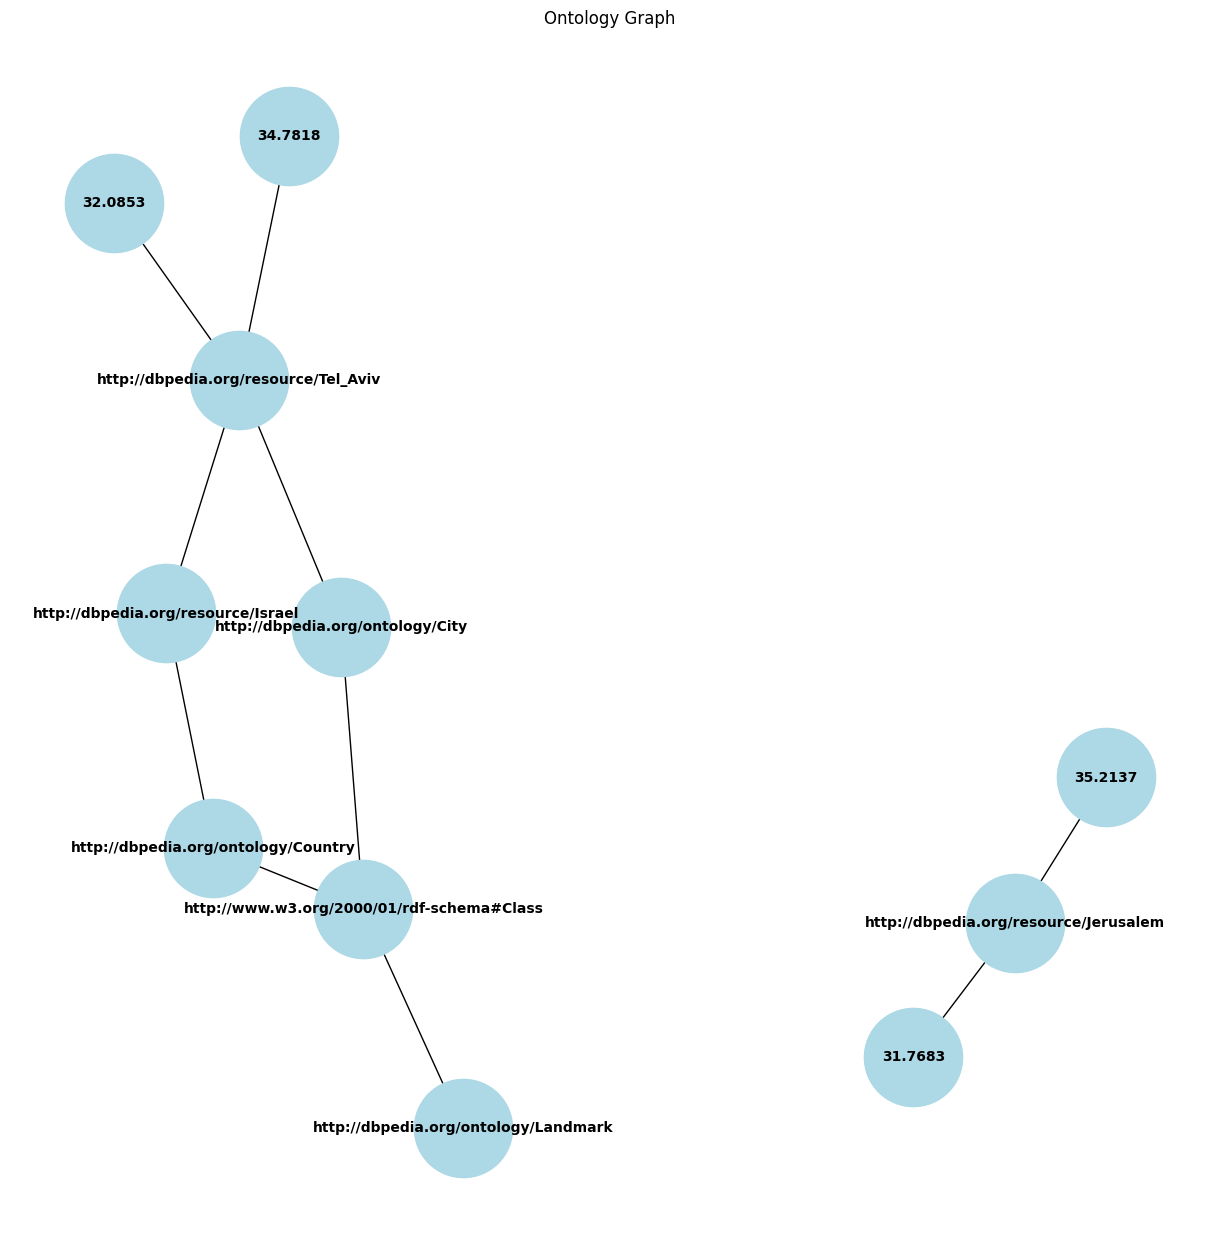

In [57]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Ontology Graph')
plt.show()

In [58]:
g.serialize(destination='ontology.rdf', format='xml')
g.serialize(destination='ontology.jsonld', format='json-ld')

<Graph identifier=Nb246cd31209b47f0aa24d61d07487670 (<class 'rdflib.graph.Graph'>)>